# Artifical neural network for handwritten digit recognition

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing





### Importing the dataset

In [ ]:
data = tf.keras.datasets.mnist
type(data)

module

### Splitting the dataset into the Training set and Test set

In [ ]:
(X_train,y_train),(X_test,y_test) = data.load_data()

### Feature Scaling

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0 #scaling so that values are between 0 and 1
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


## Part 2 - Building the model

### 1. Initializing the model

In [ ]:
model = tf.keras.models.Sequential()

### 2. Flatten the input 

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

### 2. Adding the hidden layer

In [ ]:
model.add(tf.keras.layers.Dense(128,activation='relu'))

### 3. Adding the dropout regularization

In [ ]:
model.add(tf.keras.layers.Dropout(rate = 0.2))

### 4. Adding the output layer

In [ ]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# you can do all the steps in a single line 
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

## PART 3 - Training the Artificial Neural Network

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model on the Training set

In [ ]:
r = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 10, verbose = 2)
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/10
1875/1875 - 4s - loss: 0.2892 - accuracy: 0.9159 - val_loss: 0.1416 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 - 3s - loss: 0.1399 - accuracy: 0.9583 - val_loss: 0.0996 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 - 3s - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.0839 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 - 3s - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 - 3s - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0732 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 - 3s - loss: 0.0634 - accuracy: 0.9797 - val_loss: 0.0708 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 - 3s - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0675 - val_accuracy: 0.9801
Epoch 8/10
1875/1875 - 3s - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.0681 - val_accuracy: 0.9796
Epoch 9/10
1875/1875 - 3s - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0693 - val_accuracy: 0.9791
Epoch 10/10
1875/1875 - 3s - loss: 0.0428 - accuracy: 0.9851 - val_loss: 0.0647 - 

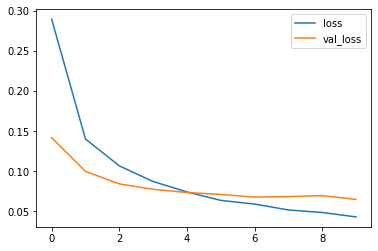

In [ ]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

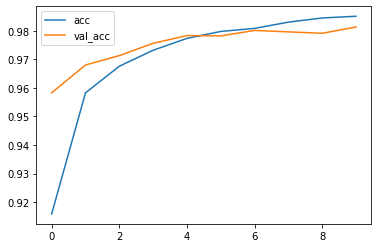

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Part 4 - Making the predictions, confusion matrix and evaluating the model

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0692 - accuracy: 0.9806
[0.06924617666350968, 0.9806]


Confusion matrix, without normalization
[[ 971    1    1    1    2    0    2    1    1    0]
 [   0 1125    4    0    0    1    2    0    3    0]
 [   4    1 1010    1    2    0    2    7    5    0]
 [   0    0    6  988    0    6    0    5    3    2]
 [   0    0    0    0  973    0    5    0    1    3]
 [   2    0    0    7    2  874    3    0    3    1]
 [   5    2    1    1    2    4  943    0    0    0]
 [   3    4    8    2    0    0    0 1003    2    6]
 [   6    0    5    2    3    3    2    3  948    2]
 [   2    3    0    6   11    3    0    5    1  978]]


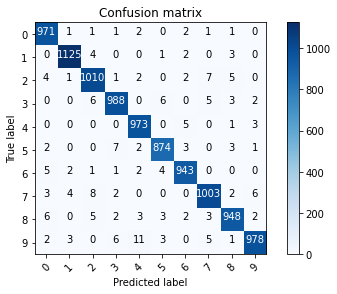

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

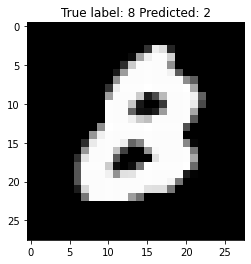

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
print(np.concatenate((p_test.reshape(len(p_test),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, p_test)
print(cm)
print(classification_report(y_test, p_test))

[[7 7]
 [2 2]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 6]]
[[ 971    1    1    1    2    0    2    1    1    0]
 [   0 1125    4    0    0    1    2    0    3    0]
 [   4    1 1010    1    2    0    2    7    5    0]
 [   0    0    6  988    0    6    0    5    3    2]
 [   0    0    0    0  973    0    5    0    1    3]
 [   2    0    0    7    2  874    3    0    3    1]
 [   5    2    1    1    2    4  943    0    0    0]
 [   3    4    8    2    0    0    0 1003    2    6]
 [   6    0    5    2    3    3    2    3  948    2]
 [   2    3    0    6   11    3    0    5    1  978]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.9